## Analyzing Patterns in Police Misconduct Complaints: Insights and Policy Recommendations

This analysis explores patterns and trends in police misconduct complaints based on a dataset provided by the Civilian Office of Police Accountability (COPA). The dataset includes information on complaints received, including the type of complaint, current status, complainant demographics, and more. The objective of this analysis is to identify significant patterns and relationships in the data to inform policy recommendations for improving police accountability and misconduct investigations.

In [20]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

df = pd.read_csv('complaints.csv')
df

,LOG_NO,COMPLAINT_DATE,ASSIGNMENT,CASE_TYPE,CURRENT_STATUS,CURRENT_CATEGORY,FINDING_CODE,POLICE_SHOOTING,BEAT,RACE_OF_COMPLAINANT,SEX_OF_COMPLAINANT,AGE_OF_COMPLAINANT,COMPLAINT_HOUR,COMPLAINT_DAY,COMPLAINT_MONTH
0,2023-0002983,07/09/2023 07:03:02 PM,BIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,1,7
1,2020-0002683,06/15/2020 09:10:09 AM,BIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,2,6
2,2020-0004209,09/08/2020 09:49:35 AM,BIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,3,9
3,2020-0002849,06/22/2020 07:11:19 PM,BIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,2,6
4,2024-0002688,03/01/2024 05:47:29 PM,COPA,Complaint,Interviewing Accused Members,Improper Search or Seizure | Improper Search o...,NaN,No,1024,Black or African American,Male,0-19,17,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108041,2023-0000370,01/27/2023 07:58:58 AM,BIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,6,1
108042,2023-0000361,01/26/2023 12:27:19 PM,BIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,5,1
108043,2023-0000352,01/26/2023 12:10:24 PM,BIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,5,1
108044,2023-0000270,01/20/2023 10:00:19 AM,BIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,6,1


## Handling Missing Values

Missing values in key columns were identified and handled. For categorical data, missing values were filled with placeholders such as 'Unknown'. For numerical data, missing values were imputed using statistical methods like mean or median.

In [21]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 LOG_NO                     0
COMPLAINT_DATE             0
ASSIGNMENT                 0
CASE_TYPE              73241
CURRENT_STATUS         73293
CURRENT_CATEGORY       73241
FINDING_CODE           74111
POLICE_SHOOTING        73241
BEAT                   73241
RACE_OF_COMPLAINANT    74766
SEX_OF_COMPLAINANT     74766
AGE_OF_COMPLAINANT     74766
COMPLAINT_HOUR             0
COMPLAINT_DAY              0
COMPLAINT_MONTH            0
dtype: int64


In [22]:
df_cleaned = df.dropna()
df_cleaned

,LOG_NO,COMPLAINT_DATE,ASSIGNMENT,CASE_TYPE,CURRENT_STATUS,CURRENT_CATEGORY,FINDING_CODE,POLICE_SHOOTING,BEAT,RACE_OF_COMPLAINANT,SEX_OF_COMPLAINANT,AGE_OF_COMPLAINANT,COMPLAINT_HOUR,COMPLAINT_DAY,COMPLAINT_MONTH
6,1029887,09/07/2009 07:45:36 PM,IPRA,Complaint,Closed,Excessive Force,No Affidavit,No,423,Black or African American,Female,0-19,19,2,9
43,1083717,01/17/2017 05:11:05 PM,IPRA,Complaint,Closed,Excessive Force,No Finding,No,1915,Black or African American,Male,40-49,17,3,1
55,1011405,12/05/2007 02:14:38 PM,IPRA,Complaint,Closed,Verbal Abuse,No Affidavit,No,2431,Black or African American,Male,Unknown,14,4,12
57,2021-0003934,10/03/2021 06:03:35 PM,COPA,Complaint,Closed Final,Verbal Abuse | Excessive Force | Verbal Abuse ...,Sustained | Not Sustained | Sustained | Exoner...,No,1021,Black or African American,Male,40-49,18,1,10
59,2021-0003934,10/03/2021 06:03:35 PM,COPA,Complaint,Closed Final,Verbal Abuse | Excessive Force | Verbal Abuse ...,Sustained | Not Sustained | Sustained | Exoner...,No,1021,Black or African American,Male,40-49,18,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107803,2022-0004580,10/25/2022 10:55:08 AM,COPA,Complaint,Pending Superintendent Review,Operational Violation | Operational Violation ...,Sustained | Sustained | Sustained | Not Sustai...,No,0524,Unknown,Unknown,Unknown,10,3,10
107806,2024-0003216,04/02/2024 02:21:34 PM,COPA,Complaint,Pending Civil Suit,Improper Search or Seizure | Making a False Re...,No Finding,No,0224,Unknown,Male,20-29,14,3,4
107813,2024-0002734,03/04/2024 10:11:04 PM,COPA,Complaint,Closed - No CPD Member,Excessive Force,No Finding,No,0924,Unknown,Male,30-39,22,2,3
107815,2024-0002199,02/02/2024 01:26:40 AM,COPA,Complaint,Closed No Allegations - Insufficient Object Ev...,Domestic Violence,No Finding,No,0323,"Some Other Race, Ethnicity, or Origin",Female,0-19,1,6,2


## Data Type Conversion

Date and time columns were converted to appropriate datetime objects, and numerical columns were converted to integer types where necessary.

In [23]:
# Convert COMPLAINT_DATE to datetime
df['COMPLAINT_DATE'] = pd.to_datetime(df['COMPLAINT_DATE'])

#Convert numerical columns to appropiate types
df['COMPLAINT_HOUR'] = df['COMPLAINT_HOUR'].astype(int)
df['COMPLAINT_DAY'] = df['COMPLAINT_DAY'].astype(int)
df['COMPLAINT_MONTH'] = df['COMPLAINT_MONTH'].astype(int)

print(df.dtypes)

C:\Users\dsori\AppData\Local\Temp\ipykernel_8084\2675235522.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['COMPLAINT_DATE'] = pd.to_datetime(df['COMPLAINT_DATE'])


LOG_NO                         object
COMPLAINT_DATE         datetime64[ns]
ASSIGNMENT                     object
CASE_TYPE                      object
CURRENT_STATUS                 object
CURRENT_CATEGORY               object
FINDING_CODE                   object
POLICE_SHOOTING                object
BEAT                           object
RACE_OF_COMPLAINANT            object
SEX_OF_COMPLAINANT             object
AGE_OF_COMPLAINANT             object
COMPLAINT_HOUR                  int32
COMPLAINT_DAY                   int32
COMPLAINT_MONTH                 int32
dtype: object


Duplicate records were identified and removed to ensure each entry in the dataset was unique.

In [24]:
df_cleaned = df.drop_duplicates()
print("Number of duplicate rows after cleaning:", df_cleaned.duplicated().sum())

Number of duplicate rows after cleaning: 0


## Standardizing Data

Text data was standardized to ensure consistency. This involved converting text to lowercase and stripping leading/trailing spaces.

In [25]:
df_cleaned['RACE_OF_COMPLAINANT'] = df_cleaned['RACE_OF_COMPLAINANT'].str.strip().str.lower()
df_cleaned['SEX_OF_COMPLAINANT'] = df_cleaned['SEX_OF_COMPLAINANT'].str.strip().str.lower()

C:\Users\dsori\AppData\Local\Temp\ipykernel_8084\2507206230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['RACE_OF_COMPLAINANT'] = df_cleaned['RACE_OF_COMPLAINANT'].str.strip().str.lower()
C:\Users\dsori\AppData\Local\Temp\ipykernel_8084\2507206230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['SEX_OF_COMPLAINANT'] = df_cleaned['SEX_OF_COMPLAINANT'].str.strip().str.lower()


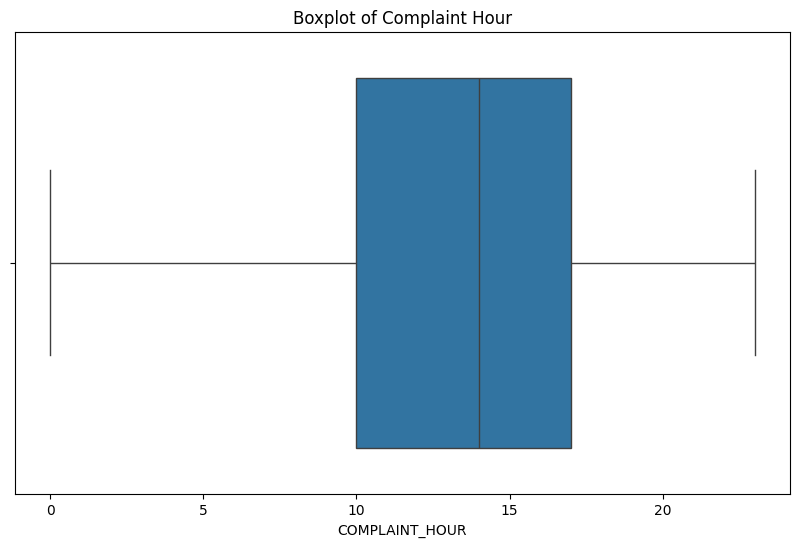

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='COMPLAINT_HOUR')
plt.title('Boxplot of Complaint Hour')
plt.show()

In [27]:
df_cleaned = df_cleaned[(df_cleaned['COMPLAINT_HOUR'] >= 0) & (df_cleaned['COMPLAINT_HOUR'] <= 23)]


In [28]:
print(df_cleaned.info())
print(df_cleaned.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 106129 entries, 0 to 108045
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   LOG_NO               106129 non-null  object        
 1   COMPLAINT_DATE       106129 non-null  datetime64[ns]
 2   ASSIGNMENT           106129 non-null  object        
 3   CASE_TYPE            32888 non-null   object        
 4   CURRENT_STATUS       32837 non-null   object        
 5   CURRENT_CATEGORY     32888 non-null   object        
 6   FINDING_CODE         32190 non-null   object        
 7   POLICE_SHOOTING      32888 non-null   object        
 8   BEAT                 32888 non-null   object        
 9   RACE_OF_COMPLAINANT  31363 non-null   object        
 10  SEX_OF_COMPLAINANT   31363 non-null   object        
 11  AGE_OF_COMPLAINANT   31363 non-null   object        
 12  COMPLAINT_HOUR       106129 non-null  int32         
 13  COMPLAINT_DAY      

## Summary Statistics

Descriptive statistics were generated to understand the distribution of data.

In [29]:
print(df_cleaned.describe(include='all'))

         LOG_NO                 COMPLAINT_DATE ASSIGNMENT  CASE_TYPE  \
count    106129                         106129     106129      32888   
unique   102060                            NaN          3          3   
top     1091770                            NaN        BIA  Complaint   
freq         10                            NaN      73241      26530   
mean        NaN  2014-02-26 14:27:34.348123392        NaN        NaN   
min         NaN            2007-09-01 00:34:36        NaN        NaN   
25%         NaN            2010-04-04 23:32:41        NaN        NaN   
50%         NaN            2013-02-26 07:33:59        NaN        NaN   
75%         NaN            2017-08-08 11:11:57        NaN        NaN   
max         NaN            2024-05-10 15:16:08        NaN        NaN   
std         NaN                            NaN        NaN        NaN   

       CURRENT_STATUS CURRENT_CATEGORY FINDING_CODE POLICE_SHOOTING   BEAT  \
count           32837            32888        32190      

## Distribution of Complaints by Month

A bar chart was created to visualize the number of complaints received each month.

C:\Users\dsori\AppData\Local\Temp\ipykernel_8084\54528317.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='COMPLAINT_MONTH', palette='viridis')


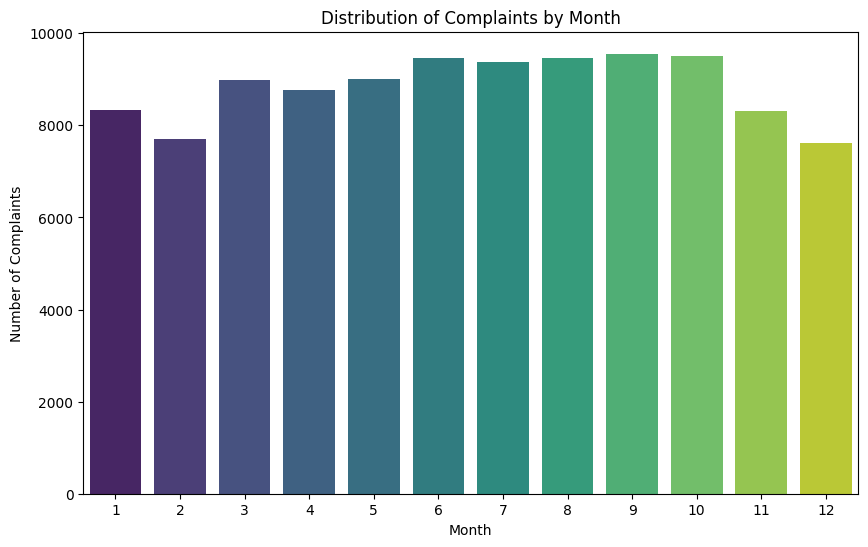

In [30]:
# Distribution of complaints by month

plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='COMPLAINT_MONTH', palette='viridis')
plt.title('Distribution of Complaints by Month')
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.show()

## Distribution of Complaints by Race

A bar chart was created to visualize the number of complaints by the race of the complainant.

C:\Users\dsori\AppData\Local\Temp\ipykernel_8084\3480398842.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='RACE_OF_COMPLAINANT', palette='viridis')


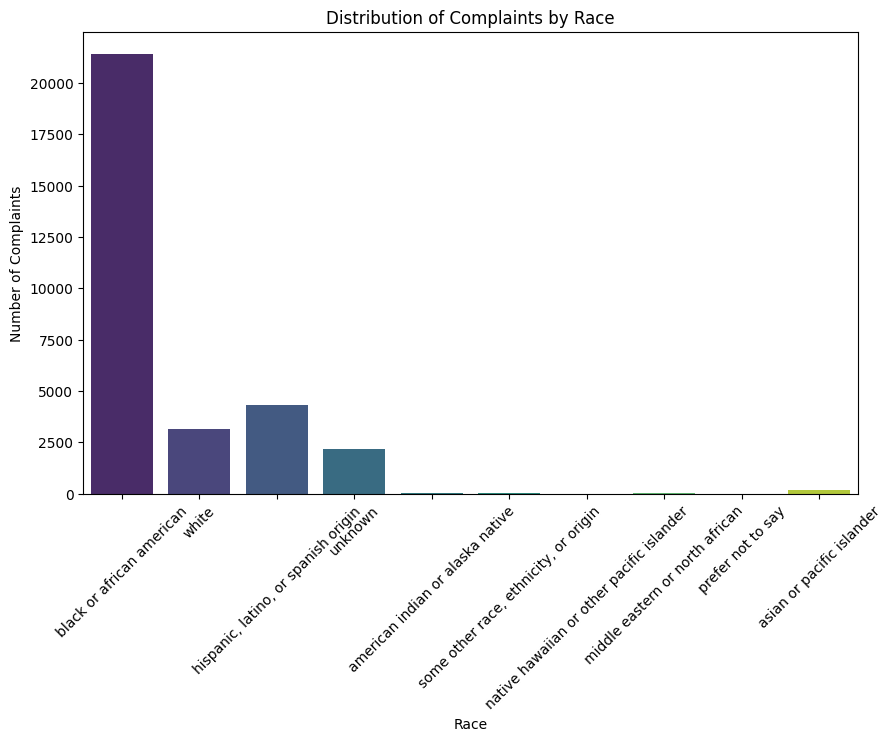

In [36]:
# Distribution of complaints by race
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='RACE_OF_COMPLAINANT', palette='viridis')
plt.title('Distribution of Complaints by Race')
plt.xlabel('Race')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()


## Complaints by Case Type

A bar chart was created to visualize the number of complaints by case type.

C:\Users\dsori\AppData\Local\Temp\ipykernel_8084\3780805969.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='CASE_TYPE', palette='viridis')


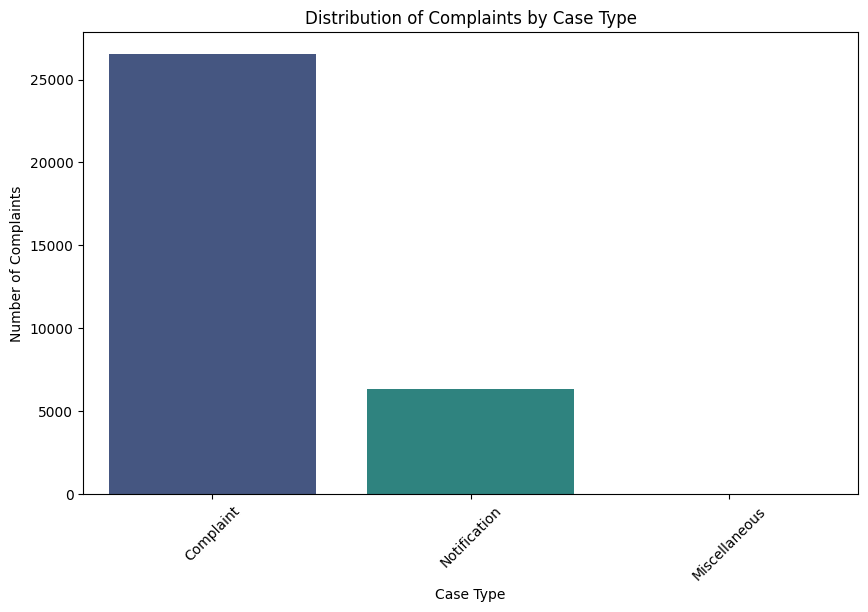

In [31]:
# Distribution of complaints by case type
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='CASE_TYPE', palette='viridis')
plt.title('Distribution of Complaints by Case Type')
plt.xlabel('Case Type')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()

## Complaints by Hour and Day

A heatmap was created to visualize the number of complaints by the hour of the day and day of the week.

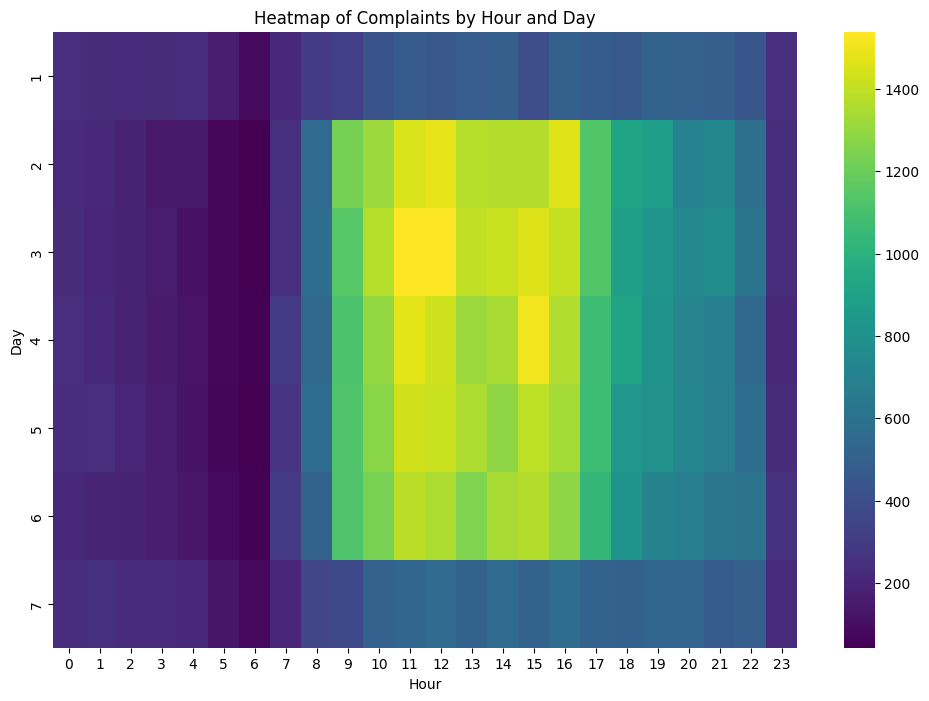

In [32]:
heatmap_data = df_cleaned.pivot_table(index='COMPLAINT_DAY', columns='COMPLAINT_HOUR', aggfunc='size', fill_value=0)

# Heatmap of complaints by hour and day
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Heatmap of Complaints by Hour and Day')
plt.xlabel('Hour')
plt.ylabel('Day')
plt.show()

## Complaints by Assignment and Current Status

Bar charts were created to visualize the number of complaints by assignment and current status.

C:\Users\dsori\AppData\Local\Temp\ipykernel_8084\1775300244.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='ASSIGNMENT', palette='viridis')


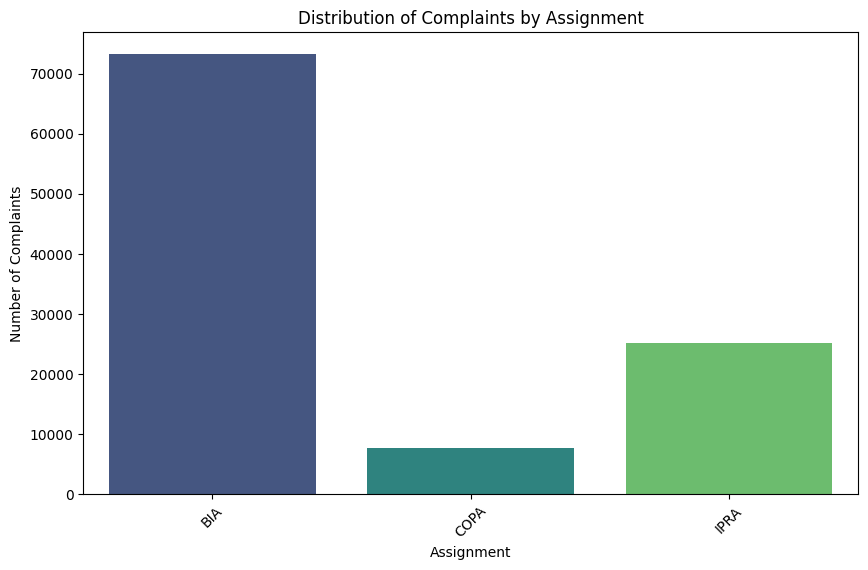

C:\Users\dsori\AppData\Local\Temp\ipykernel_8084\1775300244.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='CURRENT_STATUS', palette='viridis')


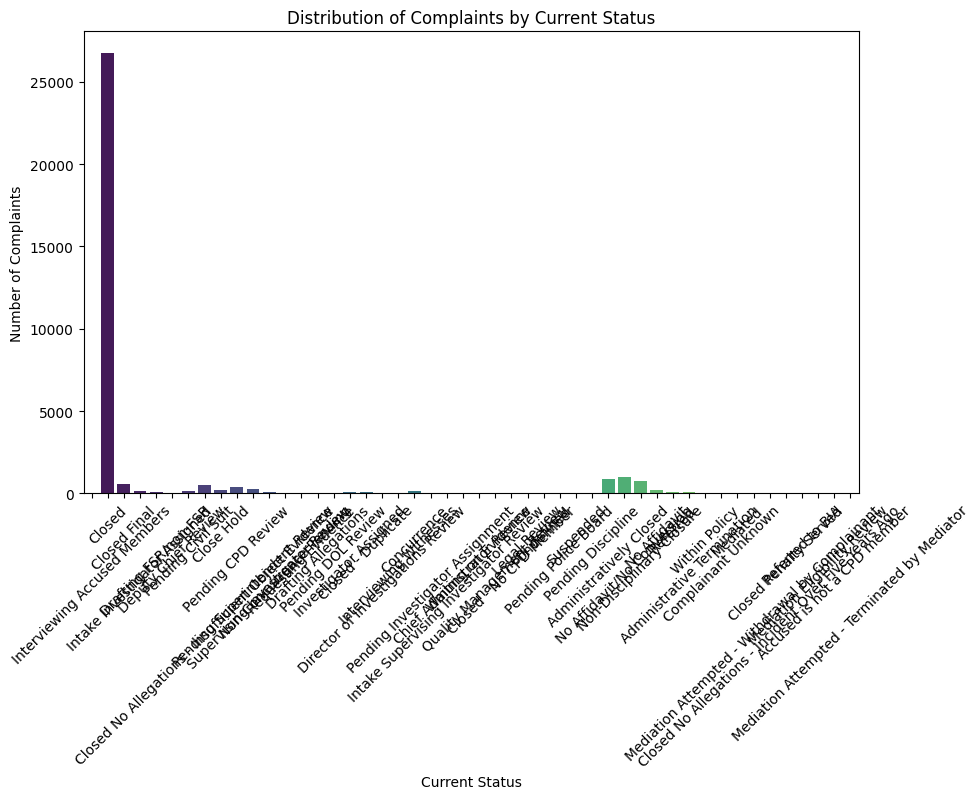

In [33]:
# Distribution of complaints by assignment
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='ASSIGNMENT', palette='viridis')
plt.title('Distribution of Complaints by Assignment')
plt.xlabel('Assignment')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()

# Distribution of complaints by current status
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='CURRENT_STATUS', palette='viridis')
plt.title('Distribution of Complaints by Current Status')
plt.xlabel('Current Status')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()


## Statistical Analysis

Additional statistical analyses were performed to identify significant patterns and relationships in the data

## Chi-Square Test for Independence

This test was conducted to determine if there was a significant relationship between categorical variables such as race and case type.

In [34]:
from scipy.stats import chi2_contingency

contigency_table_race_case = pd.crosstab(df_cleaned['RACE_OF_COMPLAINANT'], df['CASE_TYPE'])

chi2_race_case, p_race_case, dof_race_case, expected_race_case = chi2_contingency(contigency_table_race_case)

print(f"Chi-square test statistic for race and case type: {chi2_race_case}")
print(f"p-value for race and case type: {p_race_case}")

# Interpret the p-value

if p_race_case < 0.05:
    print("There is a significant relationship between race and case type.")
else:
    print("There is no significant relationship between race and case type.")

Chi-square test statistic for race and case type: 289.5315109061709
p-value for race and case type: 6.81307258502357e-51
There is a significant relationship between race and case type.


## Correlation Analysis

Correlation analysis was performed to identify relationships between numerical variables such as the complaint hour, day, and month.

                 COMPLAINT_HOUR  COMPLAINT_DAY  COMPLAINT_MONTH
COMPLAINT_HOUR         1.000000      -0.003884        -0.004450
COMPLAINT_DAY         -0.003884       1.000000        -0.008323
COMPLAINT_MONTH       -0.004450      -0.008323         1.000000


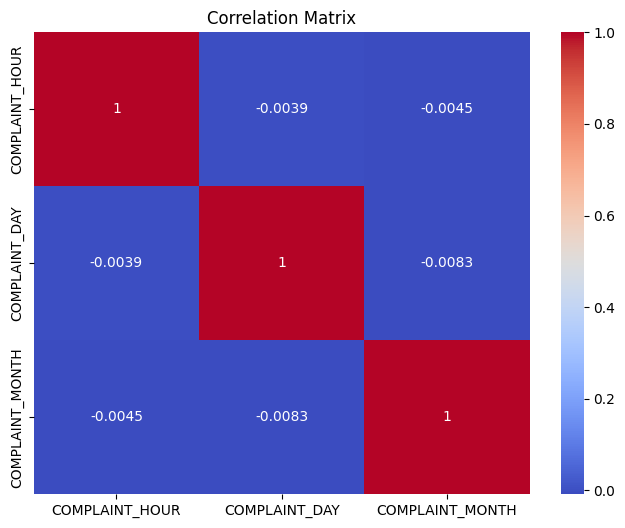

In [35]:
# Calculate the correlation matrix
correlation_matrix = df_cleaned[['COMPLAINT_HOUR', 'COMPLAINT_DAY', 'COMPLAINT_MONTH']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Findings

### Exploratory Data Analysis

Distribution of Complaints by Month: Complaints were relatively evenly distributed throughout the year, with a slight decrease in the winter months.

Distribution of Complaints by Race: The majority of complaints were filed by Black or African American individuals, followed by White and Hispanic individuals. 

Complaints by Case Type: The most common case type was 'Complaint', following by 'Notification' and 'Miscellaneous'. 

Complaints by Hour and Day: Complaints were most commonly filed during daytime hours, particularly between 9 AM and 5 PM, with some variation across different days of the week.

Complaints by Assignment and Current Status: Most complaints were assigned to BIA (Bureau of Internal Affairs), with a smaller number assigned to COPA and IPRA. The majority of complaints were marked as 'Closed'.

### Statistical Analysis

Chi-Square Test for Independence: The test revealed a significant relationship between the race of the complainant and the type of case (p < 0.05), indicating potential disparities in how different racial groups are affected.

Correlation Analysis: The correlation matrix indicated weak correlations between the complaint hour, day, and month, suggesting that the time of the complaint has limited influence on these variables.

## Policy Recommendations

Based on the findings, the following actionable recommendations are proposed:

Implement Training Programs: Reduce racial biases in policing by implementing comprehensive training programs that promote fair treatment of all individuals.

Increase Transparency: Enhance transparency in the handling and resolution of complaints to build public trust and ensure accountability.

Develop Data-Driven Policies: Use data-driven approaches to monitor and address patterns of misconduct, particularly during identified high-risk times.

Enhance Data Collection: Improve data collection efforts to capture more detailed information on complaints and their resolutions, enabling more comprehensive analysis. 

## Conclusion

This analysis identified significant patterns in police misconduct complaints, revealing disparities and potential areas for policy intervention. By implementing targeted recommendations and continuing to analyze complaint data, COPA can enhance its efforts to ensure police accountability and improve community relations. Further research is needed to explore additional factors influencing complaint outcomes and to evaluate the effectiveness of implemented policies.